In [1]:
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_train = pd.read_csv("../sample_data/Train.csv")
df_test = pd.read_csv("../sample_data/Test.csv")

In [3]:
df_train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7865,FDY34,10.500,Regular,0.011004,Snack Foods,167.1842,OUT045,2002,NaN,Tier 2,Supermarket Type1,2984.1156
5052,NCX18,14.150,Low Fat,0.000000,Household,196.3110,OUT046,1997,Small,Tier 1,Supermarket Type1,3338.9870
816,FDR58,6.675,Low Fat,0.041887,Snack Foods,92.1462,OUT013,1987,High,Tier 3,Supermarket Type1,1203.1006
5105,FDH46,6.935,Regular,0.041282,Snack Foods,103.5332,OUT046,1997,Small,Tier 1,Supermarket Type1,1230.3984
7215,FDV21,11.500,Low Fat,0.286358,Snack Foods,123.9704,OUT010,1998,NaN,Tier 3,Grocery Store,375.5112


## Analysis / Exploration

In [4]:
print(df_train.shape, df_test.shape)

(8523, 12) (5681, 11)


In [5]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df_train.count()

Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

In [7]:
df_test.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
540,FDN60,15.100,Low Fat,0.095306,Baking Goods,157.1604,OUT049,1999,Medium,Tier 1,Supermarket Type1
3511,FDB60,9.300,LF,0.028522,Baking Goods,195.0136,OUT046,1997,Small,Tier 1,Supermarket Type1
4871,FDL52,6.635,Regular,0.046184,Frozen Foods,37.0506,OUT045,2002,NaN,Tier 2,Supermarket Type1
1169,FDF28,15.700,Regular,0.037942,Frozen Foods,122.8046,OUT045,2002,NaN,Tier 2,Supermarket Type1
541,FDM09,NaN,Regular,0.150455,Snack Foods,170.8790,OUT019,1985,Small,Tier 1,Grocery Store


In [8]:
df_test.count()

Item_Identifier              5681
Item_Weight                  4705
Item_Fat_Content             5681
Item_Visibility              5681
Item_Type                    5681
Item_MRP                     5681
Outlet_Identifier            5681
Outlet_Establishment_Year    5681
Outlet_Size                  4075
Outlet_Location_Type         5681
Outlet_Type                  5681
dtype: int64

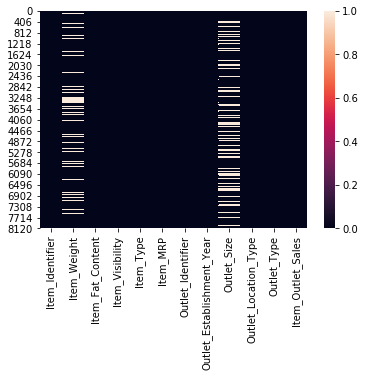

In [13]:
sns.heatmap(df_train.isnull(),)
# df_train.isnull()

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

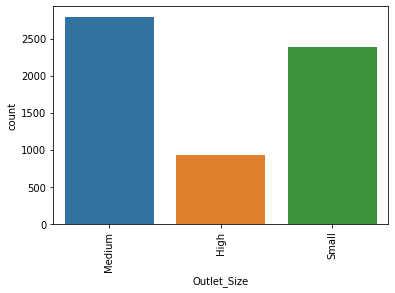

In [16]:
sns.countplot(x="Outlet_Size", data=df_train)
plt.xticks(rotation=90)

In [18]:
# df_train['Outlet_Type'].unique()
## https://thispointer.com/pandas-apply-apply-a-function-to-each-row-column-in-dataframe/

def unique_items(x):
    return len(x.unique())


df_train.apply(unique_items)

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [19]:
# sns.countplot(x="Item_Fat_Content", data=df_train)

df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

## Data Cleaning

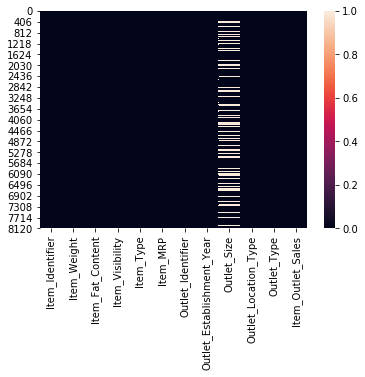

In [25]:
sns.heatmap(df_train.isnull(),)

In [21]:
# sns.heatmap(df_test.isnull(),)

In [24]:
avg = 12.7 # df_test['Item_Weight'].mean()
def replace(cols):
    if pd.isnull(cols[0]):
        return avg
    else:
        return cols[0]
    

df_train['Item_Weight'] = df_train[['Item_Weight',]].apply(replace,axis=1)


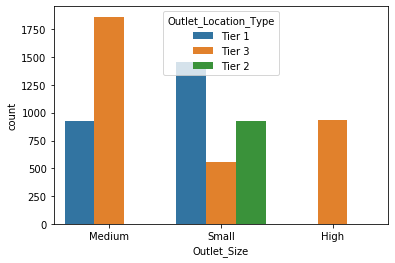

In [43]:
sns.countplot(x="Outlet_Size", hue="Outlet_Location_Type", data=df_train)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

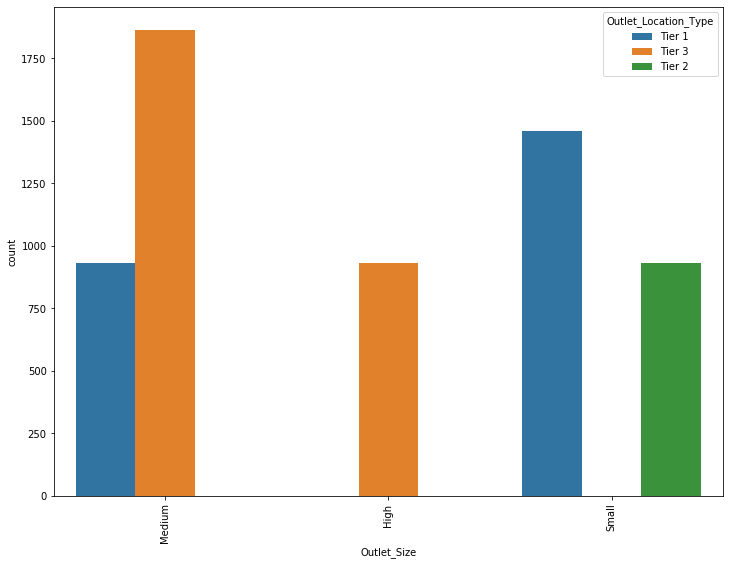

In [28]:
## Outlet_Type, Outlet_Location_Type", Outlet_Establishment_Year
## missing -> Outlet_Size
plt.figure(figsize=(12,9))
sns.countplot(x="Outlet_Size", hue="Outlet_Location_Type", data=df_train)
plt.xticks(rotation=90)

In [32]:
def replace_size(cols):
    if pd.isnull(cols[0]):
        if cols[1] == 'Grocery Store':
            return "Small"
        
        elif cols[2] =="Tier 2":
            return "Small"
        
#         elif cols[2] == "Tier 1" or cols[3] =="1985" or cols[3] =="1999":
#             return "Medium"
        
    else:
        return cols[0]

df_train['Outlet_Size'] = df_train[['Outlet_Size','Outlet_Type', 'Outlet_Location_Type', 'Outlet_Establishment_Year']].apply(replace_size,axis=1)

In [33]:
df_train.count()

Item_Identifier              8523
Item_Weight                  8523
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  8523
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

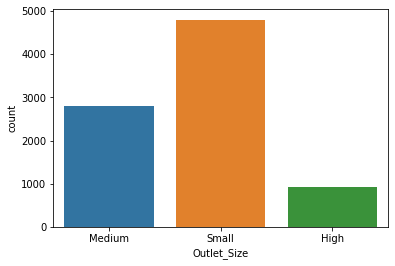

In [34]:
sns.countplot(x="Outlet_Size", data=df_train)

In [43]:
i_f = preprocessing.LabelEncoder() # Item_Fat
i_t = preprocessing.LabelEncoder() # item_type
o_i = preprocessing.LabelEncoder() # outlet_Identifier
o_l = preprocessing.LabelEncoder() #Outlet_Location_Type
o_t = preprocessing.LabelEncoder() # Outlet_Type

In [37]:
from sklearn import preprocessing
#creating labelEncoder
os = preprocessing.LabelEncoder() # outletsize

In [44]:
df_train['Outlet_Size']=os.fit_transform(df_train['Outlet_Size'])
df_train['Item_Fat_Content']=i_f.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type']=i_t.fit_transform(df_train['Item_Type'])
df_train['Outlet_Identifier']=o_i.fit_transform(df_train['Outlet_Identifier'])
df_train['Outlet_Location_Type']=o_l.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type']=o_t.fit_transform(df_train['Outlet_Type'])

In [50]:
df_y = df_train['Item_Outlet_Sales']
df_x = df_train.drop(['Item_Identifier','Item_Outlet_Sales'], axis=1)
df_y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=0)

In [52]:
model = LinearRegression()

In [53]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
y_pred = model.predict(x_test)

In [60]:
# mean_squared_error, r2_score
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 912.1096508584424
Root Mean Squared Error: 1216.463121151231


In [56]:
r2_score(y_test,y_pred)

0.5062388945778211

In [58]:
d = pd.DataFrame({'Actual Sales':y_test,"Predicted Sales":y_pred})


In [66]:
df_tn = df_test.dropna()

In [70]:
df_tn.drop(['Item_Identifier'], inplace=True, axis=1)

c:\users\maury\miniconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [71]:
df_tn['Outlet_Size']=os.fit_transform(df_tn['Outlet_Size'])
df_tn['Item_Fat_Content']=i_f.fit_transform(df_tn['Item_Fat_Content'])
df_tn['Item_Type']=i_t.fit_transform(df_tn['Item_Type'])
df_tn['Outlet_Identifier']=o_i.fit_transform(df_tn['Outlet_Identifier'])
df_tn['Outlet_Location_Type']=o_l.fit_transform(df_tn['Outlet_Location_Type'])
df_tn['Outlet_Type']=o_t.fit_transform(df_tn['Outlet_Type'])

c:\users\maury\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\maury\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\maury\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [74]:
y_pred_df_tn = model.predict(df_tn)